In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [3]:
#let's import the data
df = pd.read_csv('train_df.csv')

In [4]:
df.columns

Index(['LeadTime', 'ArrivalYear', 'ArrivalMonth', 'ArrivalDate',
       'NumWeekendNights', 'NumWeekNights', 'Parking', 'NumAdults',
       'NumChildren', 'RepeatedGuest', 'NumPrevCancellations',
       'NumPreviousNonCancelled', 'SpecialRequests', 'LeadTimeNormal',
       'AvgRoomPriceNormal', 'isCanceled', 'RoomType_Room_Type 1',
       'RoomType_Room_Type 2', 'RoomType_Room_Type 3', 'RoomType_Room_Type 4',
       'RoomType_Room_Type 5', 'RoomType_Room_Type 6', 'RoomType_Room_Type 7',
       'MealPlan_Meal Plan 1', 'MealPlan_Meal Plan 2', 'MealPlan_Meal Plan 3',
       'MealPlan_Not Selected', 'MarketSegment_Aviation',
       'MarketSegment_Complementary', 'MarketSegment_Corporate',
       'MarketSegment_Offline', 'MarketSegment_Online', 'AvgRoomPrice'],
      dtype='object')

<h1>Component Analysis</h1>
<p>We will now look for correlations between different features in the data set</p>

In [5]:
#lets make an np array of isCancelled
y = df['isCanceled'].values

In [6]:
#drop normalized columns'LeadTimeNormal''AvgRoomPriceNormal'
df = df.drop(['LeadTimeNormal'], axis=1)

<p>Let's start off with correlating each feature with cancellations </p>

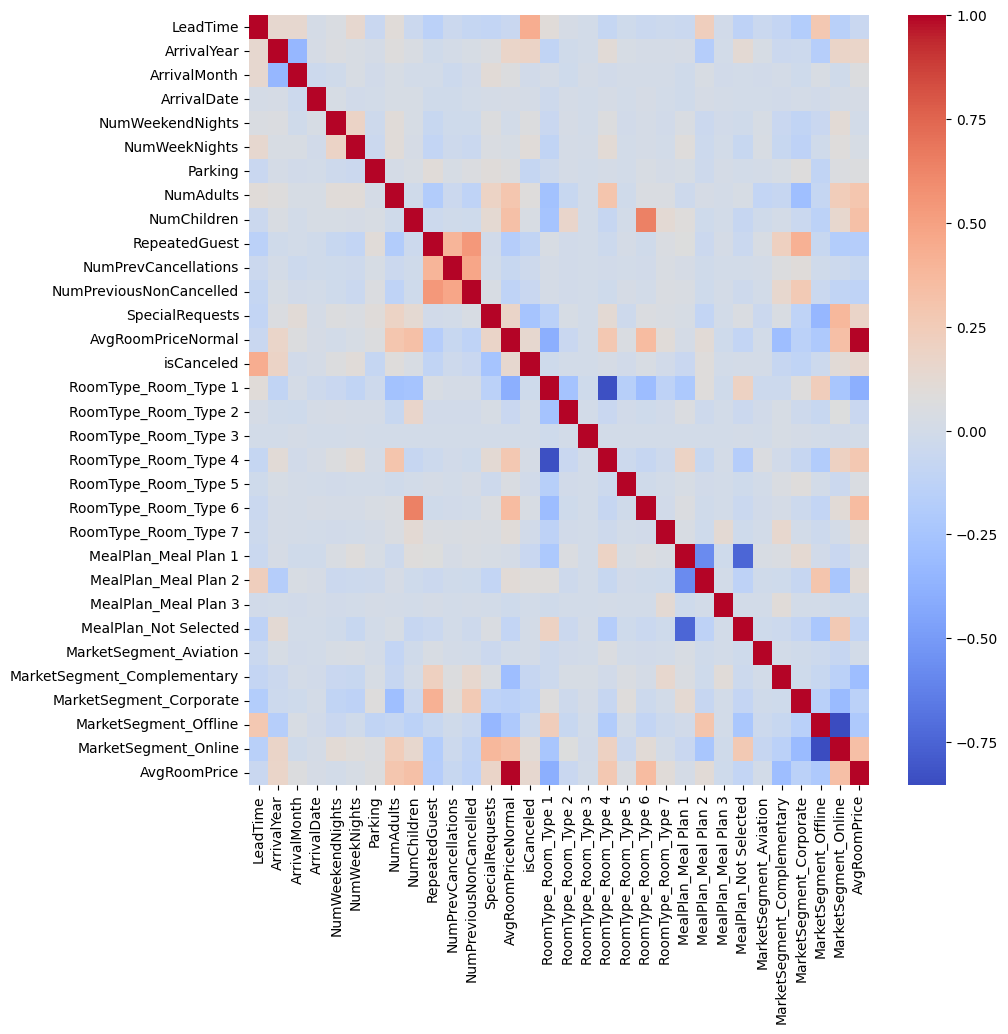

In [7]:
#let's make a correlation matrix
corr = df.corr()
#plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()


In [8]:
#from this that we can see that numChildren and room type 6 are highly correlated let's drop one of them
df = df.drop(['RoomType_Room_Type 6'], axis=1)

In [9]:
#get a count of nan in each column
df.isnull().sum()

LeadTime                       0
ArrivalYear                    0
ArrivalMonth                   0
ArrivalDate                    0
NumWeekendNights               0
NumWeekNights                  0
Parking                        0
NumAdults                      0
NumChildren                    0
RepeatedGuest                  0
NumPrevCancellations           0
NumPreviousNonCancelled        0
SpecialRequests                0
AvgRoomPriceNormal             0
isCanceled                     0
RoomType_Room_Type 1           0
RoomType_Room_Type 2           0
RoomType_Room_Type 3           0
RoomType_Room_Type 4           0
RoomType_Room_Type 5           0
RoomType_Room_Type 7           0
MealPlan_Meal Plan 1           0
MealPlan_Meal Plan 2           0
MealPlan_Meal Plan 3           0
MealPlan_Not Selected          0
MarketSegment_Aviation         0
MarketSegment_Complementary    0
MarketSegment_Corporate        0
MarketSegment_Offline          0
MarketSegment_Online           0
AvgRoomPri

In [10]:
#now let's try some PCA
#first we need to scale the data
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

#now we can do PCA
pca = PCA(n_components=4)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)


(29020, 31)
(29020, 4)


In [11]:
#what are the components?
pca.components_


array([[-3.80173882e-02,  1.41418893e-01,  1.88425259e-03,
         2.12446929e-02,  7.53413550e-02,  8.71133747e-02,
         3.30661414e-02,  2.51965276e-01,  1.77101960e-01,
        -1.71224942e-01, -8.42215521e-02, -1.25406500e-01,
         1.98035428e-01,  4.01775970e-01,  8.05766991e-02,
        -3.37201583e-01,  3.34814286e-02, -2.96310738e-03,
         2.85557290e-01,  1.27907151e-02,  4.78554697e-02,
         5.27462562e-02, -6.75745010e-02, -9.93954210e-03,
        -7.83689718e-03, -6.51878442e-03, -1.22586823e-01,
        -1.66546621e-01, -2.66043197e-01,  3.58143874e-01,
         4.01775970e-01],
       [-3.11097401e-01,  2.54531126e-02, -6.13046717e-02,
        -1.27326785e-02, -3.31326931e-02, -6.85851733e-02,
         1.25463138e-01, -1.14639672e-01,  6.03768867e-02,
         3.87537936e-01,  2.57816856e-01,  3.43605206e-01,
         1.46182326e-01, -5.45680299e-02, -2.17494694e-01,
        -1.79752344e-01,  6.05676666e-02,  2.80045850e-03,
         1.36012192e-01,  5.14

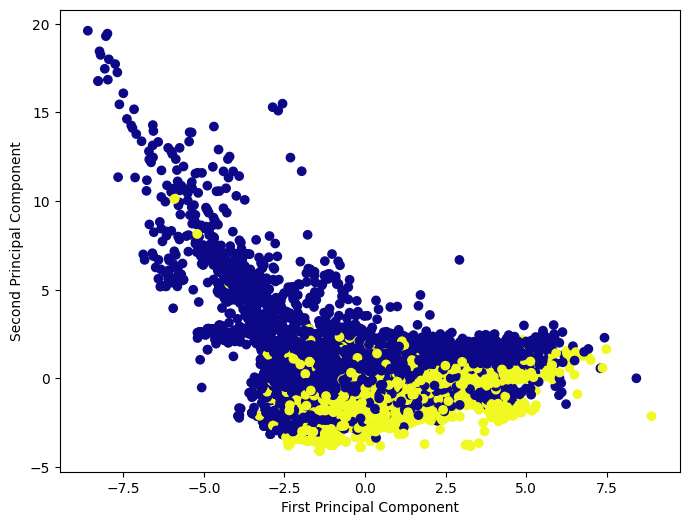

In [12]:
#visualize the pca
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

<Axes: xlabel='isCanceled', ylabel='AvgRoomPrice'>

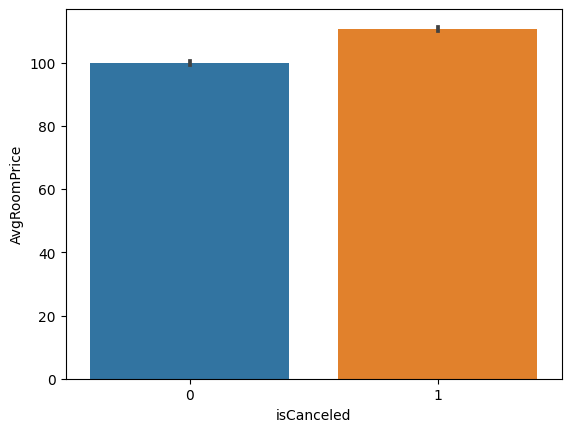

In [13]:
#price vs cancellation in bar chart
sns.barplot(x='isCanceled', y='AvgRoomPrice', data=df)


<Axes: xlabel='isCanceled', ylabel='AvgRoomPriceNormal'>

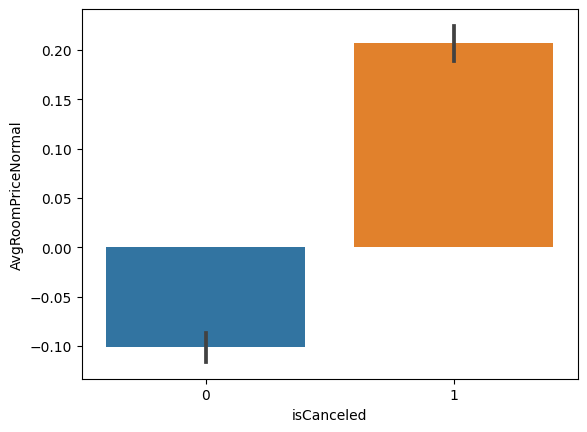

In [14]:
#normalize AvgRoomPrice
df['AvgRoomPriceNormal'] = (df['AvgRoomPrice'] - df['AvgRoomPrice'].mean()) / df['AvgRoomPrice'].std()
#now plot again
sns.barplot(x='isCanceled', y='AvgRoomPriceNormal', data=df)


<Axes: xlabel='LeadTime', ylabel='AvgRoomPrice'>

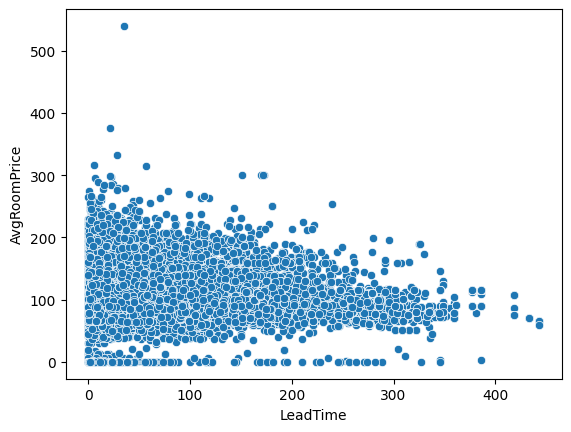

In [15]:
#let's compare room price to leadTime
sns.scatterplot(x='LeadTime', y='AvgRoomPrice', data=df)


In [16]:
#read 

marketSegment = pd.read_csv('marketSegment.csv')
marketSegment.head()


,MarketSegment
0,Corporate
1,Online
2,Online
3,Online
4,Offline


Text(0.5, 1.0, 'Market Segment vs Cancellation')

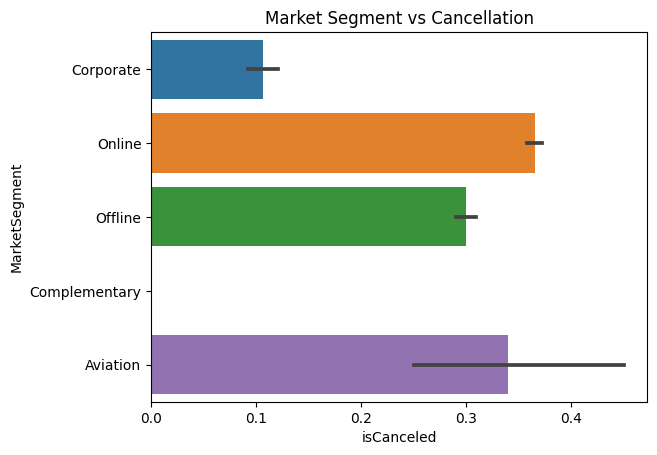

In [17]:
#plot the market segment and cancellation
sns.barplot(x=df['isCanceled'], y=marketSegment['MarketSegment'])
#title
plt.title('Market Segment vs Cancellation')

Text(0.5, 1.0, 'Booking Methods')

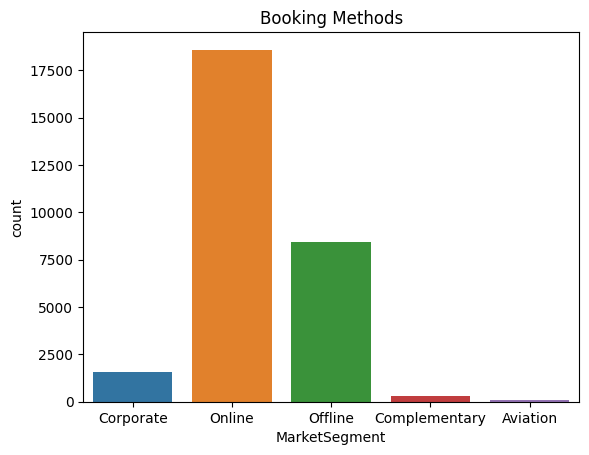

In [18]:
#let's look at the propoertions of booking methods
sns.countplot(x=marketSegment['MarketSegment'])
#add a title 
plt.title('Booking Methods')


In [19]:
#lets collect a set of the df where the MarketSegment_Online
dfOnline = df[df['MarketSegment_Online'] == 1]

Text(0.5, 1.0, 'Room Price vs Cancellation for Online Bookings')

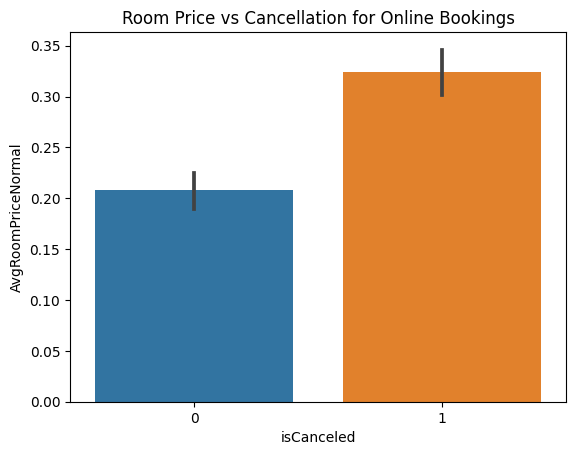

In [20]:
#lets compare the AVG room price of online vs offline
sns.barplot(x='isCanceled', y='AvgRoomPriceNormal', data=dfOnline)
plt.title('Room Price vs Cancellation for Online Bookings')